# I. Generate all lattice walks, 2D square lattice

In [1]:
# This I showed in class:


steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks(path, L):
    """Generate all random walks on the 2D square lattice."""
    if L == 0:
        print(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path.copy()
            pp.append((x + dx, y + dy))
            generate_walks(pp, L - 1)

## Store the walks

Printing walks is nice, but not very useful. Better construct a list of all walks, for postprocessing. To this end, add a `cache` parameter, which stores all generated walks.

In [693]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks2(path, L, cache):
    if L == 0:        
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
        
            generate_walks2(pp, L - 1, cache)

In [694]:
cache= []
generate_walks2([(0, 0)], 2, cache)
len(cache)

16

## Task 0

Compute the average end-to-end distance of random walks of a given length. What is the scaling of the end-to-end distance with the length of the walk? What is the scaling of the mean *square* end-to-end distance with the length?

In [695]:
import matplotlib.pyplot as plt
%matplotlib inline

In [741]:
# Compute the average end-to-end vector r and distance a of random walks of a given length L

def avg_end2end_vector(L, cache):
    a_sum = 0
    r=[]
    a=[]
    x_sum = 0
    y_sum = 0
    for i in range(len(cache)):
        # Compute for each walks
        r_y_i = cache[i][L][1] - cache[i][0][1]  #for Y 
        r_x_i = cache[i][L][0] - cache[i][0][0]  #for X
        r_i = (r_x_i, r_y_i)
        #Compute the average end-to-end distance a
        a_i =  (r_x_i**2 + r_y_i**2)**0.5
        a_sum += a_i
        x_sum += r_x_i
        y_sum += r_y_i
        r.append(r_i) # save average end-to-end vector for each walks in memory
        a.append(a_i) # save  end-to-end distance for each walks in memory
        #compute and print average distance
        a_avg =a_sum/(i+1)
    print('(x_avg,y_avg,e2e distance,count)')    
    print(round(x_sum/(i+1)),round(y_sum/(i+1)),a_avg,len(cache))          
    return a_avg
    
    


(x_avg,y_avg,e2e distance,count)
0 0 0.0 1
(x_avg,y_avg,e2e distance,count)
0 0 1.0 4
(x_avg,y_avg,e2e distance,count)
0 0 1.2071067811865477 16
(x_avg,y_avg,e2e distance,count)
0 0 1.5885254915624203 64
(x_avg,y_avg,e2e distance,count)
0 0 1.7532798363559174 256
(x_avg,y_avg,e2e distance,count)
0 0 2.0193315606071582 1024
(x_avg,y_avg,e2e distance,count)
0 0 2.1612211221359865 4096
(x_avg,y_avg,e2e distance,count)
0 0 2.374821460732043 16384
(x_avg,y_avg,e2e distance,count)
0 0 2.5017070926792733 65536
(x_avg,y_avg,e2e distance,count)
0 0 2.6842200373912326 262144


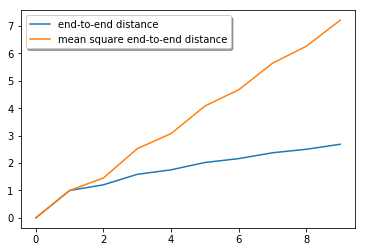

In [752]:
# compute and plot end-to-end distance 
# and mean square end-to-end distance from the length L of the walk
r=[]
a=[]
scaling=[]
scaling_sq=[]
for L in range(10):
    cache= []
    generate_walks2([(0, 0)], L, cache)
    distance_i = avg_end2end_vector(L, cache)
    scaling.append(distance_i)
    scaling_sq.append(distance_i**2)
fig, ax = plt.subplots()
ax.plot(scaling, label='end-to-end distance')
ax.plot(scaling_sq, label="mean square end-to-end distance")
legend = ax.legend(loc='upper left', shadow=True)

# I. Generate all SAWs on a 2D square lattice

A self-avoiding walk is a random walk where a lattice site can only be visited once.

In [737]:
from random import randint
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]
L=4
def generate_SAWs(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
            # self-avoiding walk condition
            if pp.count(pp[-1]) == 1:                
                generate_SAWs(pp, L - 1, cache)

In [738]:
cache=[]
generate_SAWs([(0, 0)], 2, cache)
cache

[[(0, 0), (1, 0), (2, 0)],
 [(0, 0), (1, 0), (1, 1)],
 [(0, 0), (1, 0), (1, -1)],
 [(0, 0), (-1, 0), (-2, 0)],
 [(0, 0), (-1, 0), (-1, 1)],
 [(0, 0), (-1, 0), (-1, -1)],
 [(0, 0), (0, 1), (1, 1)],
 [(0, 0), (0, 1), (-1, 1)],
 [(0, 0), (0, 1), (0, 2)],
 [(0, 0), (0, -1), (1, -1)],
 [(0, 0), (0, -1), (-1, -1)],
 [(0, 0), (0, -1), (0, -2)]]

In [688]:
pp=[(0, 0), (1, 0), (0, 0)]
if pp.count(pp[-1]) == 1:
    print(pp)
 

## Task 1

How many walks of a given length are there? What is the mean end-to-end distance of walks of a given length? What is mean *square* of the end-to-end distance?

In [748]:
# ...
# ... Enter your code and results here
##  watch TASK 0 --> avg_end2end_vector

(x_avg,y_avg,e2e distance,count)
0 0 0.0 1
(x_avg,y_avg,e2e distance,count)
0 0 1.0 4
(x_avg,y_avg,e2e distance,count)
0 0 1.6094757082487303 12
(x_avg,y_avg,e2e distance,count)
0 0 2.046267540555414 36
(x_avg,y_avg,e2e distance,count)
0 0 2.5570255311726613 100
(x_avg,y_avg,e2e distance,count)
0 0 2.9512053136683383 284
(x_avg,y_avg,e2e distance,count)
0 0 3.3905293993647274 780
(x_avg,y_avg,e2e distance,count)
0 0 3.7476893934881423 2172
(x_avg,y_avg,e2e distance,count)
0 0 4.149885562855251 5916
(x_avg,y_avg,e2e distance,count)
0 0 4.487146601788904 16268


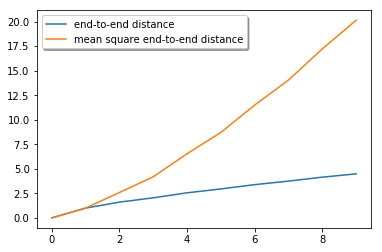

In [750]:
#compute and plot end-to-end distance 
# and mean square end-to-end distance from the length L of the self-avoiding walk
r=[]
a=[]
scalingSRW=[]
scaling_sqSRW=[]
for L in range(10):
    cache= []
    generate_SAWs([(0, 0)], L, cache)
    distance_i = avg_end2end_vector(L, cache)
    scalingSRW.append(distance_i)
    scaling_sqSRW.append(distance_i**2)
fig, ax = plt.subplots()
ax.plot(scalingSRW, label='end-to-end distance')
ax.plot(scaling_sqSRW, label="mean square end-to-end distance")
legend = ax.legend(loc='upper left', shadow=True)

# Plot end2end distance from the length L for RW and SRW

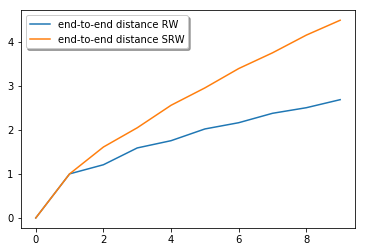

In [753]:
fig, ax = plt.subplots()
ax.plot(scaling, label='end-to-end distance RW')
ax.plot(scalingSRW, label="end-to-end distance SRW")
legend = ax.legend(loc='upper left', shadow=True)